# Introduction
The project is to help predict the possibility of precipitations and its consequential flight delays by using various variables including temperature, wind speed, humidity, dew point, and pressure. The sample dataset used in the project contains 5727 rows (about 5% or original rows) and 9 variables.

**About the Data Source:** The NOAA JFK dataset contains 114,546 hourly observations of various local climatological variables (including visibility, temperature, wind speed and direction, humidity, dew point, and pressure). The data was collected by a NOAA weather station located at the John F. Kennedy International Airport in Queens, New York.

**Data Link (sample dataset):** https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/noaa-weather-sample-data.tar.gz

**License:** CDLA-Sharing

In [1]:
# Installing tidymodels
install.packages("tidymodels")
install.packages("rlang")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("rlang"):
“installation of package ‘rlang’ had non-zero exit status”


In [2]:
# Load tidyverse & tidymodels
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

## Downloading and untarring the sample dataset

In [3]:
url <- "https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/noaa-weather-sample-data.tar.gz"
download.file(url, destfile = "noaa-weather-sample-data.tar.gz")
untar("noaa-weather-sample-data.tar.gz", tar = "internal")

Warning message in untar2(tarfile, files, list, exdir, restore_times):
“using pax extended headers”


## Exploring the data
Reading the dataset and exploring its columns, number of rows and data types.

In [4]:
jfk_weather_sample_df <-read.csv("noaa-weather-sample-data/jfk_weather_sample.csv")
head(jfk_weather_sample_df)
glimpse(jfk_weather_sample_df)

,DATE,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYPrecip,HOURLYWindSpeed,HOURLYSeaLevelPressure,HOURLYStationPressure
,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>,<dbl>,<dbl>
1,2015-07-25T13:51:00Z,60,46,83,68,0.00,13,30.01,29.99
2,2016-11-18T23:51:00Z,34,48,53,44,0.00,6,30.05,30.03
3,2013-01-06T08:51:00Z,33,89,36,35,0.00,13,30.14,30.12
4,2011-01-27T16:51:00Z,18,48,36,30,0.00,14,29.82,29.80
5,2015-01-03T12:16:00Z,27,61,39,34,T,11,NA,30.50
6,2013-02-15T20:51:00Z,35,79,41,38,0.00,6,29.94,29.92


Rows: 5,727
Columns: 9
$ DATE                   <chr> "2015-07-25T13:51:00Z", "2016-11-18T23:51:00Z",…
$ HOURLYDewPointTempF    <chr> "60", "34", "33", "18", "27", "35", "4", "14", …
$ HOURLYRelativeHumidity <int> 46, 48, 89, 48, 61, 79, 51, 65, 90, 94, 79, 37,…
$ HOURLYDRYBULBTEMPF     <int> 83, 53, 36, 36, 39, 41, 19, 24, 54, 73, 83, 44,…
$ HOURLYWETBULBTEMPF     <int> 68, 44, 35, 30, 34, 38, 15, 21, 52, 72, 78, 35,…
$ HOURLYPrecip           <chr> "0.00", "0.00", "0.00", "0.00", "T", "0.00", "0…
$ HOURLYWindSpeed        <int> 13, 6, 13, 14, 11, 6, 0, 11, 11, 5, 21, 7, 17, …
$ HOURLYSeaLevelPressure <dbl> 30.01, 30.05, 30.14, 29.82, NA, 29.94, 30.42, 3…
$ HOURLYStationPressure  <dbl> 29.99, 30.03, 30.12, 29.80, 30.50, 29.92, 30.40…


## Data Preprocessing
For preprocessing the following columns are selected and inspected:

* HOURLYRelativeHumidity
* HOURLYDRYBULBTEMPF
* HOURLYPrecip
* HOURLYWindSpeed
* HOURLYStationPressure

In [5]:
jfk_weather_sub_df <- jfk_weather_sample_df %>%
 select(HOURLYRelativeHumidity, HOURLYDRYBULBTEMPF, HOURLYPrecip, HOURLYWindSpeed, HOURLYStationPressure)

head(jfk_weather_sub_df, 10)

,HOURLYRelativeHumidity,HOURLYDRYBULBTEMPF,HOURLYPrecip,HOURLYWindSpeed,HOURLYStationPressure
,<int>,<int>,<chr>,<int>,<dbl>
1,46,83,0.00,13,29.99
2,48,53,0.00,6,30.03
3,89,36,0.00,13,30.12
4,48,36,0.00,14,29.80
5,61,39,T,11,30.50
6,79,41,0.00,6,29.92
7,51,19,0.00,0,30.40
8,65,24,0.00,11,30.35
9,90,54,0.06,11,30.03


In [6]:
unique(jfk_weather_sub_df$HOURLYPrecip)

[1] "0.00"  "T"     "0.06"  NA      "0.03"  "0.02"  "0.08"  "0.01"  "0.07" 
[10] "0.16"  "0.09"  "0.22"  "0.02s" "0.24"  "0.18"  "0.05"  "0.04"  "0.09s"
[19] "0.11"  "0.14"  "0.25"  "0.10"  "0.01s" "0.58"  "0.12"  "0.13"  "0.46" 
[28] "1.07"  "1.19"  "0.34"  "0.20"  "0.36s" "0.42"  "0.17"  "0.27"  "0.35" 
[37] "0.31"  "0.33"  "0.23"  "0.26"  "0.28"  "0.75"  "0.19"  "0.36"  "0.03s"
[46] "0.07s" "0.54"  "0.59"  "0.21"

### Data Cleaning
Cleaning values that have characters ("T" and "s").

In [7]:
jfk_weather_sub_df2 <- jfk_weather_sub_df %>%
 mutate(HOURLYPrecip = str_replace_all(HOURLYPrecip, "T", "0.0"))

jfk_weather_sub_df3 <- jfk_weather_sub_df2 %>%
 mutate(HOURLYPrecip = str_remove(HOURLYPrecip, pattern = "s$"))

unique(jfk_weather_sub_df3$HOURLYPrecip)

[1] "0.00" "0.0"  "0.06" NA     "0.03" "0.02" "0.08" "0.01" "0.07" "0.16"
[11] "0.09" "0.22" "0.24" "0.18" "0.05" "0.04" "0.11" "0.14" "0.25" "0.10"
[21] "0.58" "0.12" "0.13" "0.46" "1.07" "1.19" "0.34" "0.20" "0.36" "0.42"
[31] "0.17" "0.27" "0.35" "0.31" "0.33" "0.23" "0.26" "0.28" "0.75" "0.19"
[41] "0.54" "0.59" "0.21"

### Converting Datatype
Convert HOURLYPrecip to the numeric

In [8]:
jfk_weather_sub_df4 <- jfk_weather_sub_df3 %>%
  mutate_all(type.convert) %>%
  mutate_if(is.character, as.numeric)

glimpse(jfk_weather_sub_df4)

Rows: 5,727
Columns: 5
$ HOURLYRelativeHumidity <int> 46, 48, 89, 48, 61, 79, 51, 65, 90, 94, 79, 37,…
$ HOURLYDRYBULBTEMPF     <int> 83, 53, 36, 36, 39, 41, 19, 24, 54, 73, 83, 44,…
$ HOURLYPrecip           <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,…
$ HOURLYWindSpeed        <int> 13, 6, 13, 14, 11, 6, 0, 11, 11, 5, 21, 7, 17, …
$ HOURLYStationPressure  <dbl> 29.99, 30.03, 30.12, 29.80, 30.50, 29.92, 30.40…


### Renaming Columns

*   'HOURLYRelativeHumidity' to 'relative_humidity'
*   'HOURLYDRYBULBTEMPF' to 'dry_bulb_temp_f'
*   'HOURLYPrecip' to 'precip'
*   'HOURLYWindSpeed' to 'wind_speed'
*   'HOURLYStationPressure' to 'station_pressure'

In [9]:
jfk_weather_sub_df5 <- jfk_weather_sub_df4 %>% 
rename('relative_humidity' = 'HOURLYRelativeHumidity',
'dry_bulb_temp_f' = 'HOURLYDRYBULBTEMPF',
'precip' = 'HOURLYPrecip',
'wind_speed' = 'HOURLYWindSpeed',
'station_pressure' = 'HOURLYStationPressure')

glimpse(jfk_weather_sub_df5)

Rows: 5,727
Columns: 5
$ relative_humidity <int> 46, 48, 89, 48, 61, 79, 51, 65, 90, 94, 79, 37, 72, …
$ dry_bulb_temp_f   <int> 83, 53, 36, 36, 39, 41, 19, 24, 54, 73, 83, 44, 57, …
$ precip            <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.06…
$ wind_speed        <int> 13, 6, 13, 14, 11, 6, 0, 11, 11, 5, 21, 7, 17, 8, 3,…
$ station_pressure  <dbl> 29.99, 30.03, 30.12, 29.80, 30.50, 29.92, 30.40, 30.…


## Data Training - Train/Test Split
Splitting the data into a training (80%) and testing set (20%).

In [10]:
set.seed(1234)
train_test <- initial_split(jfk_weather_sub_df5, prop = 0.8)
train_set <- training(train_test)
test_set <- testing(train_test)

## Data Modeling - Simple Linear Regression
Exploring four simple linear regression models where:
* precip as the dependent variable ~ relative_humidity as independent variable
* precip ~ dry_bulb_temp_f
* precip ~ wind_speed
* precip ~ station_pressure

Also calculating R Square and RMSE for each model along the way.


Call:
lm(formula = precip ~ relative_humidity, data = train_set)

Coefficients:
      (Intercept)  relative_humidity  
       -0.0203017          0.0004074  


[1] 0.001817648

[1] 0.04263388

[1] 0.0348126

Warning message:
“Removed 1349 rows containing missing values (geom_point).”


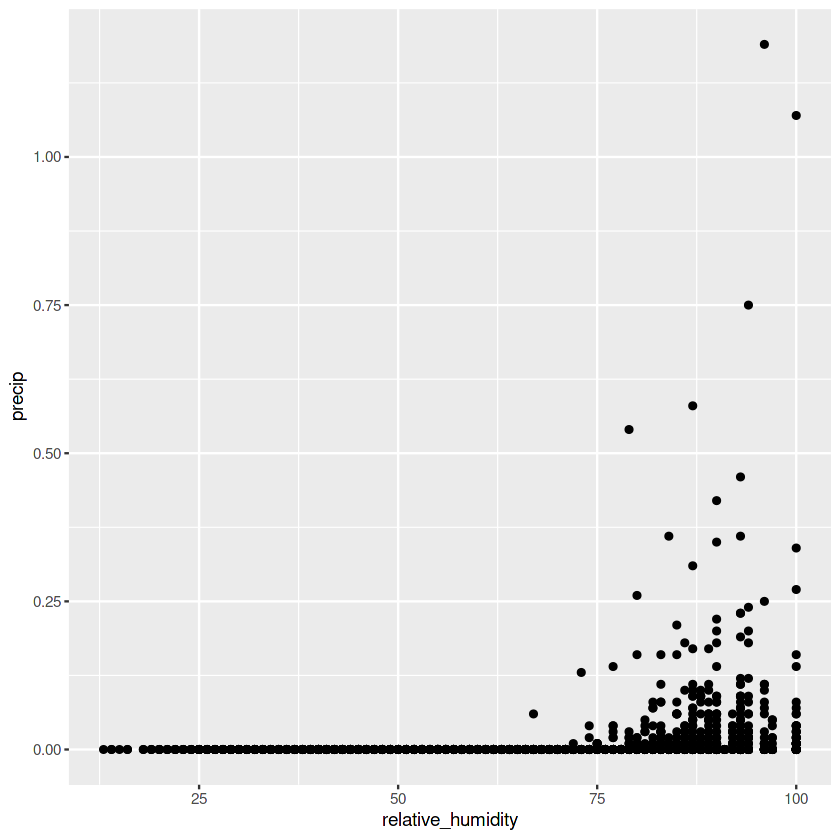

In [11]:
lm_1_train <- lm(precip ~ relative_humidity, data = train_set)
lm_1_train

mse_lm_1_train <- mean(lm_1_train$residuals^2)
mse_lm_1_train

rmse_lm_1_train <- sqrt(mse_lm_1_train)
rmse_lm_1_train

summary(lm_1_train)$r.squared


train_set %>%
ggplot(aes(relative_humidity, precip))+
  geom_point()


Call:
lm(formula = precip ~ dry_bulb_temp_f, data = train_set)

Coefficients:
    (Intercept)  dry_bulb_temp_f  
      4.752e-03        3.226e-05  


[1] 0.001882899

[1] 0.04339239

[1] 0.0001637693

Warning message:
“Removed 1349 rows containing missing values (geom_point).”


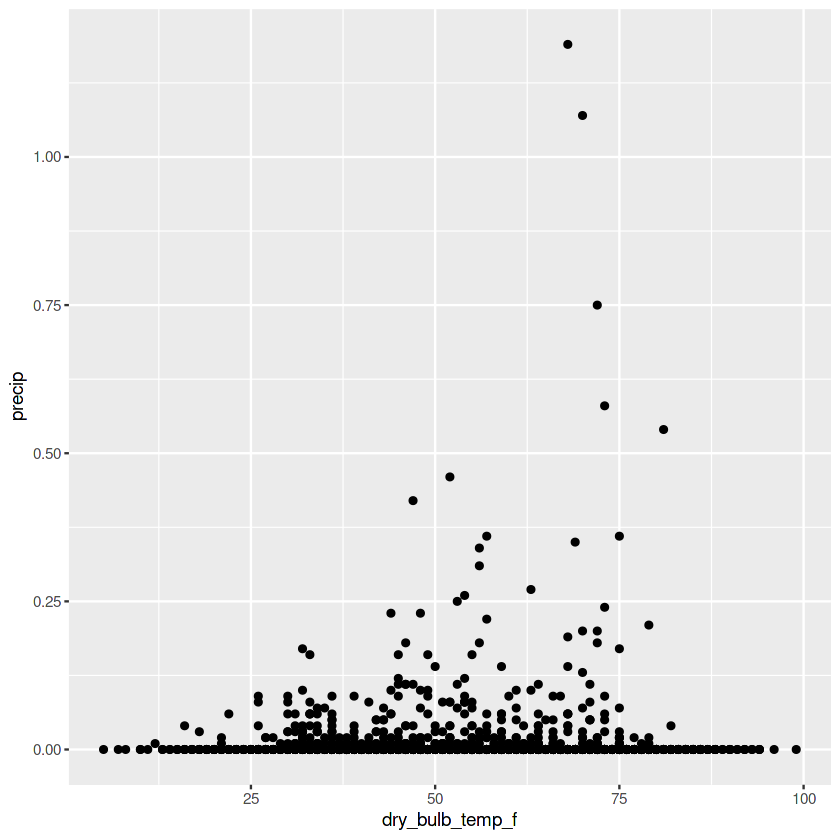

In [12]:
lm_2_train <- lm(precip ~ dry_bulb_temp_f, data = train_set)
lm_2_train

mse_lm_2_train <- mean(lm_2_train$residuals^2)
mse_lm_2_train

rmse_lm_2_train <- sqrt(mse_lm_2_train)
rmse_lm_2_train

summary(lm_2_train)$r.squared


train_set %>%
ggplot(aes(dry_bulb_temp_f, precip))+
  geom_point()


Call:
lm(formula = precip ~ wind_speed, data = train_set)

Coefficients:
(Intercept)   wind_speed  
  0.0022478    0.0003811  


[1] 0.001877623

[1] 0.04333155

[1] 0.00296521

Warning message:
“Removed 1349 rows containing missing values (geom_point).”


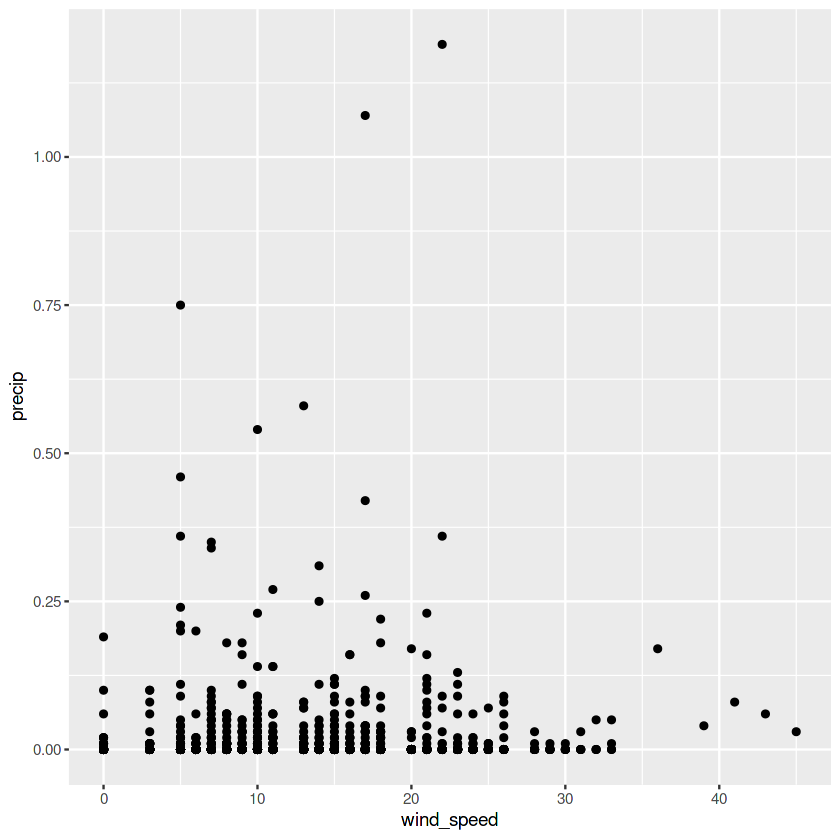

In [13]:
lm_3_train <- lm(precip ~ wind_speed, data = train_set)
lm_3_train

mse_lm_3_train <- mean(lm_3_train$residuals^2)
mse_lm_3_train

rmse_lm_3_train <- sqrt(mse_lm_3_train)
rmse_lm_3_train

summary(lm_3_train)$r.squared


train_set %>%
ggplot(aes(wind_speed, precip))+
  geom_point()


Call:
lm(formula = precip ~ station_pressure, data = train_set)

Coefficients:
     (Intercept)  station_pressure  
          0.6844           -0.0226  


[1] 0.001855649

[1] 0.04307724

[1] 0.01557426

Warning message:
“Removed 1353 rows containing missing values (geom_point).”


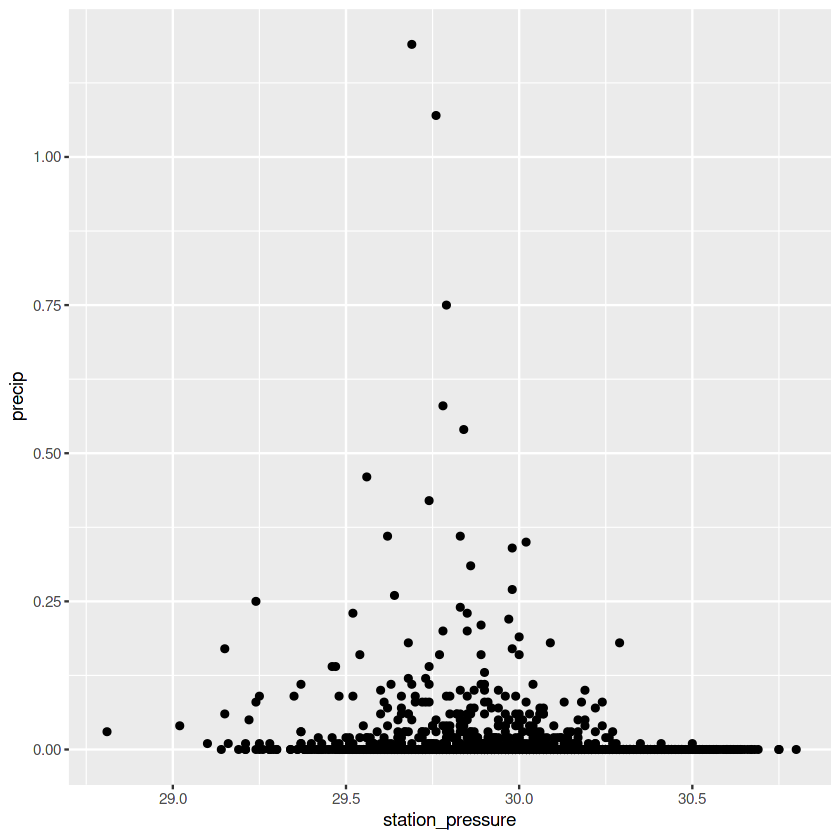

In [14]:
lm_4_train <- lm(precip ~ station_pressure, data = train_set)
lm_4_train

mse_lm_4_train <- mean(lm_4_train$residuals^2)
mse_lm_4_train

rmse_lm_4_train <- sqrt(mse_lm_4_train)
rmse_lm_4_train

summary(lm_4_train)$r.squared

train_set %>%
ggplot(aes(station_pressure, precip))+
  geom_point()

## Data Modeling - Multiple Linear Regression
Exploring two multiple linear regression models:

* precip ~ relative_humidity + station_pressure 
* precip ~ relative_humidity + station_pressure + wind_speed

Also calculating R Square and RMSE for each model along the way.

In [15]:
mlr_1_train <- lm(precip ~ relative_humidity + station_pressure, data = train_set)
mlr_1_train

mse_mlr_1_train <- mean(mlr_1_train$residuals^2)
mse_mlr_1_train

rmse_mlr_1_train <- sqrt(mse_mlr_1_train)
rmse_mlr_1_train

summary(mlr_1_train)$r.squared


Call:
lm(formula = precip ~ relative_humidity + station_pressure, data = train_set)

Coefficients:
      (Intercept)  relative_humidity   station_pressure  
        0.4382946          0.0003621         -0.0151897  


[1] 0.001807087

[1] 0.04250985

[1] 0.04133643

In [16]:
mlr_2_train <- lm(precip ~ relative_humidity + station_pressure + wind_speed, data = train_set)
mlr_2_train

mse_mlr_2_train <- mean(mlr_2_train$residuals^2)
mse_mlr_2_train

rmse_mlr_2_train <- sqrt(mse_mlr_2_train)
rmse_mlr_2_train

summary(mlr_2_train)$r.squared


Call:
lm(formula = precip ~ relative_humidity + station_pressure + 
    wind_speed, data = train_set)

Coefficients:
      (Intercept)  relative_humidity   station_pressure         wind_speed  
        0.2610712          0.0004252         -0.0096480          0.0006087  


[1] 0.001795482

[1] 0.04237313

[1] 0.04749299

## Evaluating the models on the testing set

In [17]:
lm_1_test <- lm(precip ~ relative_humidity, data = test_set)

mse_lm_1_test <- mean(lm_1_test$residuals^2)
mse_lm_1_test

rmse_lm_1_test <- sqrt(mse_lm_1_test)
rmse_lm_1_test

summary(lm_1_test)$r.squared

[1] 0.001103604

[1] 0.03322053

[1] 0.05872807

In [18]:
lm_2_test <- lm(precip ~ dry_bulb_temp_f, data = test_set)

mse_lm_2_test <- mean(lm_2_test$residuals^2)
mse_lm_2_test

rmse_lm_2_test <- sqrt(mse_lm_2_test)
rmse_lm_2_test

summary(lm_2_test)$r.squared

[1] 0.001172429

[1] 0.03424076

[1] 2.603192e-05

In [19]:
lm_3_test <- lm(precip ~ wind_speed, data = test_set)

mse_lm_3_test <- mean(lm_3_test$residuals^2)
mse_lm_3_test

rmse_lm_3_test <- sqrt(mse_lm_3_test)
rmse_lm_3_test

summary(lm_3_test)$r.squared

[1] 0.001130241

[1] 0.03361906

[1] 0.03600857

In [20]:
lm_4_test <- lm(precip ~ station_pressure, data = test_set)

mse_lm_4_test <- mean(lm_4_test$residuals^2)
mse_lm_4_test

rmse_lm_4_test <- sqrt(mse_lm_4_test)
rmse_lm_4_test

summary(lm_4_test)$r.squared

[1] 0.001133233

[1] 0.03366352

[1] 0.03345711

In [21]:
mlr_1_test <- lm(precip ~ relative_humidity + station_pressure, data = test_set)

mse_mlr_1_test <- mean(mlr_1_test$residuals^2)
mse_mlr_1_test

rmse_mlr_1_test <- sqrt(mse_mlr_1_test)
rmse_mlr_1_test

summary(mlr_1_test)$r.squared

[1] 0.001084371

[1] 0.03292979

[1] 0.07513153

In [22]:
mlr_2_test <- lm(precip ~ relative_humidity + station_pressure + wind_speed, data = test_set)

mse_mlr_2_test <- mean(mlr_2_test$residuals^2)
mse_mlr_2_test

rmse_mlr_2_test <- sqrt(mse_mlr_2_test)
rmse_mlr_2_test

summary(mlr_2_test)$r.squared

[1] 0.001031513

[1] 0.03211718

[1] 0.1202144

## Finding the best model
Evaluating the best model based on the highest R Square and the lowest RMSE.

In [23]:
model_names <- c("lm_1", "lm_2", "lm_3", "lm_4", "mlr_1", "mlr_2")
train_rmse <- c("0.042633884986004", "0.043392385033562", "0.0433315518426125", "0.0430772440922356", "0.0425098471997881", "0.0423731277100182")
test_rmse <- c("0.03322053062065", "0.0342407570726119", "0.0336190623854605", "0.0336635239626001", "0.0329297928037371", "0.0321171813867534")
train_rsquared <- c("0.0348125959119728", "0.00016376925087888", "0.00296520979252207", "0.01557426038156", "0.0413364254294442", "0.0474929860384939")
test_rsquared <- c("0.0587280705157021", "0.0000260319245104704", "0.0360085732827907", "0.0334571088498333", "0.0751315309095512", "0.120214446648217")
comparison_df <- data.frame(model_names, train_rmse, test_rmse, train_rsquared, test_rsquared)

In [24]:
comparison_df %>%
#Comparison data frame is arrnaged by descending R-Squared values and ascending RMSE values
arrange(desc(train_rsquared), train_rmse)
#Based on the outcome, the mlr_2 offers the best model since the model has the highest R Square and the lowest RMSE.

model_names,train_rmse,test_rmse,train_rsquared,test_rsquared
<chr>,<chr>,<chr>,<chr>,<chr>
mlr_2,0.0423731277100182,0.0321171813867534,0.0474929860384939,0.120214446648217
mlr_1,0.0425098471997881,0.0329297928037371,0.0413364254294442,0.0751315309095512
lm_1,0.042633884986004,0.03322053062065,0.0348125959119728,0.0587280705157021
lm_4,0.0430772440922356,0.0336635239626001,0.01557426038156,0.0334571088498333
lm_3,0.0433315518426125,0.0336190623854605,0.00296520979252207,0.0360085732827907
lm_2,0.043392385033562,0.0342407570726119,0.00016376925087888,0.0000260319245104704
